# Project Phase 4
##### Michelle Yang (zy233) & Rachel Zhang (rz329)

## Introduction
-------------------------------------------------------------
Anime is a type of hand-drawn and computer animation from Japan that is very popular across the world. It has influenced segments of pop culture in many ways since it first originated and continues to do so.

The goal of this analysis is to dissect the anime consumer base so that anime studios may better understand what genres, age groups, and length they should target to get maximum rating and viewership. The types of animes that are released may bring about the next wave of pop cultural notes.

### Research Questions
##### Which animes are the top rated animes? Why are they top rated?
- How might number of episodes of an anime play into popularity and ranking?

##### What are the genre preferences for each gender? Do they play into stereotypes?
- What can analyzing favorites tell us about this?

##### Which animes are most favorited and why?
- How does genre play into this?

### Results


##### Key findings

## Data collection & cleaning
----------------------------------------------------------------------
All datasets were obtained from Kaggle. These datasets are collected by Kaggle users from by web-crawling MyAnimeList (MAL) https://myanimelist.net/ and the unofficial Jikan API. Users created these datasets for personal/public interests and are not funded. 

Missing anime data and manual comparison with the website suggests that there may have been some interruptions during web-scraping causing some data to be unrecorded (NaN). There are also many duplicate observations in the dataset from Kaggle. 

Cleaning of the datasets was done 2 different times to account for the multiple datasets and merging, and the removal of certain animes that were missing particular data (such as episodes) for one analysis, but had sufficient data for other analysis. (Cleaning process below)

#### animes_marlesson_may20.csv
- List of anime scrapped from MAL.
- Attributes (12): uid, title, synopsis, genre, aired (date), rank, popularity, score, episodes, members, img_url, and link. 
- Observations: individual animes

#### profiles.csv 
- Information about users who watch anime, namely username, birth date, gender, and favorite animes list.
- Attributes (5): profile, gender, birthday, favorites_animes, link
- Observations: individual users
- Data on user profiles were collected without informing users. Their informaiton is publicly provided by the user. 

### Raw source data
----------------------------------------------------------------------
https://www.kaggle.com/marlesson/myanimelist-dataset-animes-profiles-reviews?select=reviews.csv

- animes_marlesson_may20.csv
- profiles_marlesson_may20.csv

### Cleaning - Preparing genre/gender analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import ast

#Style
plt.style.use("seaborn")

### Cleaning - Preparing episode/rank/popularity analysis

In [2]:
#importing "anime_marlesson_jan20.csv"
anime_epdata = pd.read_csv("animes_marlesson_jan20.csv")
print("Number of Columns in anime_epdata: " + str(len(anime_epdata.columns)))
print("Number of Observations in anime_epdata: " + str(len(anime_epdata)))

#Brief cleaning of dataset, removed links and dropped duplicates
anime_epdata = anime_epdata.drop(columns = ['img_url', 'link', 'synopsis'])
anime_epdata = anime_epdata.drop_duplicates()
print("\nNumber of Columns in anime_epdata: " + str(len(anime_epdata.columns)))
print("Number of Observations in anime_epdata: " + str(len(anime_epdata)))

anime_epdata.head()

Number of Columns in anime_epdata: 12
Number of Observations in anime_epdata: 19311

Number of Columns in anime_epdata: 9
Number of Observations in anime_epdata: 16368


,uid,title,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


#### Removing movies, OVAs, and specials
Now we want to remove the anime movies and OVAs/specials from the list because they are marked as 1 episode in the dataset. This can skew the analysis because we want to investigate the rating and popularity of TV shows . Many movies with high/low rankings can make it seem like the lower number of episodes result in high/low rankings.

In [3]:
anime_epdata = anime_epdata[anime_epdata["episodes"] != 1.0]
anime_epdata = anime_epdata.copy()
print("Number of TV animes in anime_epdata: " + str(len(anime_epdata)))

Number of TV animes in anime_epdata: 8555


#### Animes with NaN episodes
First, we removed animes with NaN in number of episodes but have an end date. After checking with MAL, these animes seemed to have had an error when compiling the data. For example, one anime was completed at 55 episodes, but the observation in the dataframe had NaN as its number of episodes. 

In [4]:
#Remove animes that have an end date but have NaN episodes

#Currently unsolved error

#anime_takeout = anime_epdata.query('episodes == "NaN" & aired.str.find("?") == -1')
#print("Number of animes with start and end date: {}".format(len(anime_takeout)))
#anime_epdata = anime_epdata.drop(anime_takeout.index)
#print("Number of remainding animes after removal: {}".format(len(anime_epdata)))

There are many animes with an unknown number of episodes (NaN). After looking through the dataset for a pattern, we found that a lot of the animes also have unknown end dates (date to ?), meaning they are ongoing for a while. Manual searching on MyAnimeList showed that these animes tend to have a large number of episodes and are outliers at ~800-1000+ episodes. We decided to apply a placeholder for the number of episodes at 900 since taking a sample of those animes (after manual lookup) showed they averaged around 900.

In [5]:
#Adjust so that if NaN in anime[episodes], fill in with random number between 800 and 1000
is_nan = anime_epdata["episodes"].isna()
number_of_nan = is_nan.sum()
print("Number of NaN episode animes with large number of episodes: {}".format(number_of_nan))
random_eps = np.random.randint(800, 1000, size=number_of_nan)
anime_epdata.loc[is_nan, 'episodes'] = random_eps

Number of NaN episode animes with large number of episodes: 543


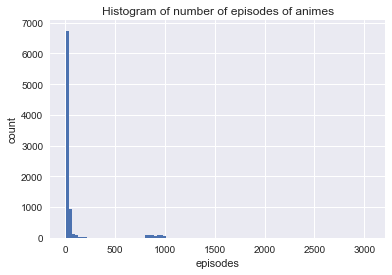

In [6]:
plt.hist(anime_epdata["episodes"], bins=100)
plt.title("Histogram of number of episodes of animes")
plt.xlabel('episodes')
plt.ylabel('count')
plt.show()

From the histogram, we see that there's are a few animes (9) that have over 1000 episodes. Since there are so few in the entire sample, we decided to remove it from the dataset. There is a spike near where the 900 episode bin is, that is most likely due to our filling in NaN episodes as 900.

In [7]:
print("Statistical summary of the outliers (animes with over 1000 episodes")
anime_epdata_over1k = anime_epdata[anime_epdata["episodes"] > 1000]
print(round(anime_epdata_over1k.score.describe(),2))

#Removing outlier (anime with episodes > 1000)
anime_epdata = anime_epdata[anime_epdata["episodes"] < 1000]

Statistical summary of the outliers (animes with over 1000 episodes
count    9.00
mean     6.14
std      0.63
min      5.66
25%      5.84
50%      5.89
75%      6.22
max      7.74
Name: score, dtype: float64


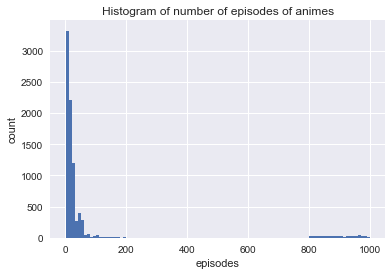

In [8]:
#New histogram of anime episodes with outliers removed
plt.hist(anime_epdata["episodes"], bins=100)
plt.title("Histogram of number of episodes of animes")
plt.xlabel('episodes')
plt.ylabel('count')
plt.show()

## Data description
-------------------------------------------------------------
#### anime_data

In [9]:
print("Number of columns: " + str(len(anime_data.columns)))
print("Column names:") 
for column in anime_data.columns: 
    print(column)
print("Number of observations (anime): " + str(len(anime_data)))
print("Number of observations (anime): " + str(len(anime_epdata)))

NameError: name 'anime_data' is not defined

Observations: an anime series

Attributes: 
- uid: identifier for each anime set by MAL.
- title: title of the anime series in Japanese/English as set by MAL.
- synopsis: summary of the anime plot.
- genre: genre categories the anime falls in (multiple).
- aired: the start and end date of airing of the anime. "?" end dates means it is ongoing.
- episodes: number of episodes of the anime.
- members: number of members who've added the anime to their list: All Anime, Currently Watching, Completed, On Hold, Dropped, or Plan to Watch. The higher the number of members, the higher the popularity (lower numerical value). 
- popularity: 1-max number of animes ranking system based on the number of members that have it on its list in comparison to the other animes on MAL.
- rating: aggregate rating from 0.00 to 10.00 by the MAL community.
- ranked: 1-max number of animes ranking system based on its rating to the other animes on MAL.
- aired_year: the year of its start aired date.

**anime_epdata** has the same column attributes as anime_data, without synopsis and aired_year. It has less observations because animes with missing episodes were removed.

#### users

In [10]:
print("Number of columns: " + str(len(users.columns)))
print("Column names:")
for column in users.columns:
    print(column)
print("Number of observations (users): " + str(len(users)))

NameError: name 'users' is not defined

Observations: singular MAL user (public profile)

Attributes: 
- profile: username of MAL user (set by the user)
- gender: gender (male, female, non-binary) of the MAL user (set by the user) 
- favorites: List of animes the user put into their Anime List - favorites
- birth_year: birth year of the user (set by the user)

## Pre-registration statement
-------------------------------------------------------------

#### Analysis 1: The relationship between gender and genre preferences

From the user.csv, we can get information from around 53,000 users out of 81,000 users about their gender (binary M/F) and favorite animes. In the anime_marlesson_jan20.csv, we have information about the multiple genres each anime is tagged by. We would use get_dummies on the genres and gender, and match them with the user, removing double-counts (for animes that have the same genres). Then we could find the likelihood of a certain gender to choose a certain genre by performing a linear regression, and looking at the regression coefficient of the resulting model. We would expect that males are more likely to watch genres such as action and adventure than females, and that females are more likely to watch genres such as romance.

At the same time, however, genres are not the only factor that males/females take into account, since females also do watch certain action or adventure anime. To dig deeper, we will perform a multivariable linear regression with other predictors such as popularity and rank (on top of genres). In doing so, we could analyze the potentially different weights that males v. females assign to the aspects of an anime that influence their watching decision.

#### Analysis 2: The relationship between rank and number of episodes

From anime_marlesson_jan20.csv, we can get the information of an anime's rank and the number of episodes that it has. We will perform a linear regression analysis to find the correlation between the number of episodes and the anime's resulting rank. While we expect that animes that are ranked higher may get more episodes, it is also possible that the anime gets more episodes because people ranked it highly, or because it was "mainstream." To better understand the assumed positive correlation between rank and number of episodes, we could then perform a multivariable regression analysis, with rank as the measured variable, with factors such as popularity (which is a measure of how "mainstream" it is).


## Data Analysis
-------------------------------------------------------------

### Anime Episodes

In [11]:
print("Statistical summary of anime episodes")
print(round(anime_epdata.episodes.describe(),2))

Statistical summary of anime episodes
count    8546.00
mean       76.11
std       217.67
min         2.00
25%         4.00
50%        12.00
75%        26.00
max       999.00
Name: episodes, dtype: float64


It looks like the majority of the anime are within 100 episodes. The large standard deviation may be due to the large number of anime in the 800-1000 episode region which may skew the data.

### Popularity and ranking/score

In [12]:
rank=anime_epdata["ranked"]
popularity=anime_epdata["popularity"]
score=anime_epdata["score"]
members=anime_epdata["members"]
episodes=anime_epdata["episodes"]

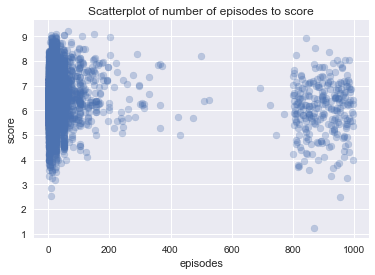

In [13]:
plt.scatter(episodes, score, alpha=0.3)
plt.title("Scatterplot of number of episodes to score")
plt.xlabel('episodes')
plt.ylabel('score')
plt.show()

Looking at this data, most of the animes are within 100 episodes, and there is a cluster around 800-1000 episodes. The score for the animes don't usually go below 3.0 and animes with a high number of episodes still tend to score just as well as the animes near the lower end of number of episodes.

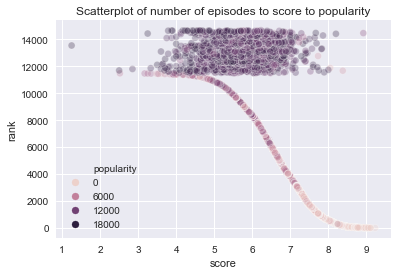

In [14]:
sns.scatterplot(score, rank, popularity, alpha=0.3)
plt.title("Scatterplot of number of episodes to score to popularity")
plt.xlabel('score')
plt.ylabel('rank')
plt.show()

The graph follows the general relationship between score and rank in that the higher the score, the higher its ranking (inversed). It is interesting to see that it is not a linear relationship. It is interesting to see that there is a large cluster around range of 4-7 score with a low rank.

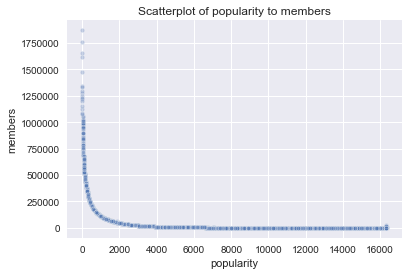

In [15]:
sns.scatterplot(popularity, members, alpha=0.3, s=20)
plt.title("Scatterplot of popularity to members")
plt.xlabel('popularity')
plt.ylabel('members')
plt.show()

The graph follows the general relationship between popularity and number of members in that the higher the number of members, the higher its popularity (inversed). Just as with score and rank, it is interesting to see that it is not a linear relationship.

### Episodes and popularity
Because popularity is based on number of members and is inversed (lower the numerical value the better), we also analyzed members aong with popularity.

##### Linear Regression model

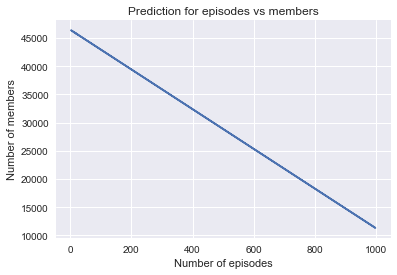

r-squared value with episodes: 0.003916501287817065
regression slope with episodes: -35.1625616183033


In [16]:
members_model = LinearRegression().fit(anime_epdata[["episodes"]], anime_epdata["members"])
predictions = members_model.predict(anime_epdata[["episodes"]])
plt.plot(anime_epdata["episodes"], predictions)
plt.title("Prediction for episodes vs members")
plt.xlabel('Number of episodes')
plt.ylabel('Number of members')
plt.show()
print("r-squared value with episodes: {}".format(members_model.score(anime_epdata[["episodes"]], anime_epdata["members"])))
print("regression slope with episodes: {}".format(members_model.coef_[0]))

It seems that with higher number of episodes, there are less anime watchers who add it to their list, suggesting that fewer people are exposed to it in general. However, we don't know which list they added it to (it may be dropped animes). That may mean that the longer the anime, the more intimidating it might be for users to start wathing it. Overall, we can say that there is less exposure for longer animes. A multi-variable analysis could help further analyze this relationship.

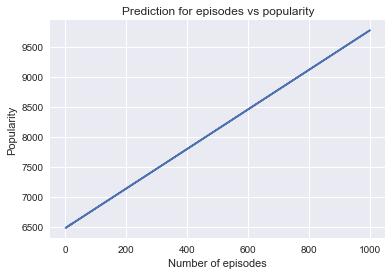

r-squared value with episodes: 0.025297959205990317
regression slope with episodes: 3.3072497471218028


In [17]:
popularity_model = LinearRegression().fit(anime_epdata[["episodes"]], anime_epdata["popularity"])
predictions = popularity_model.predict(anime_epdata[["episodes"]])
plt.plot(anime_epdata["episodes"], predictions)
plt.title("Prediction for episodes vs popularity")
plt.xlabel('Number of episodes')
plt.ylabel('Popularity')
plt.show()
print("r-squared value with episodes: {}".format(popularity_model.score(anime_epdata[["episodes"]], anime_epdata["popularity"])))
print("regression slope with episodes: {}".format(popularity_model.coef_[0]))

As with the members v episodes linear regression model, the higher number of episodes put the anime are at lower (inversed) general popularity.  

##### Multivariable linear regression

In [20]:
#Currently unsolved error

#multi_episode_model = LinearRegression().fit(anime_epdata[["popularity", "ranked", "score","members"]], anime_epdata["episodes"])
#multi_predictions = multi_episode_model.predict(anime_epdata[["popularity", "ranked", "score","members"]])
#print("coefficient for popularity: {}".format(multi_episodes_model.coef_[0]))
#print("coefficient for ranked: {}".format(multi_episodes_model.coef_[1]))
#print("coefficient for score: {}".format(multi_episodes_model.coef_[2]))
#print("coefficient for members: {}".format(multi_episodes_model.coef_[3]))
#print("r-squared value: {}".format(multi_episodes_model.score(anime_epdata[[popularity", "ranked", "score","members"]], anime_epdata["episodes"])))

## Data limitations
-------------------------------------------------------------
Although we had a vast array of data available to us, there were some limitations we faced in our analyses.

Datasets:

- The anime_data dataset was missing some anime titles, which was observed when no anime data could be found for anime of a certain anime uid.
- The user profiles dataset contained birth years, but the outliers in birth years demonstrate that some user data might have been fabricated. This puts the validity of the data into question since the birth years in the dataset might not have been the users' actual birth years.
- Over 500 anime that are ongoing or have end dates were missing episodes in the dataset despite having a set number of episodes on MAL. This may have been an error in the initial collection of data. These were removed which took out the data for these set of animes.
- We worked under the assumption that animes with unknown end dates and NaN episodes had 800-1000 episodes, it may have heavily skewed the data in that not all the unknown end date and unknown episode animes had that many episodes.
